In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



Reading in the Excel file I created with Neighborhood Name, District, Zip Code, Latitude and Longitude

In [4]:
df = pd.read_excel(r"C:\Users\bkoll\OneDrive\Desktop\Capstone Project\Neighborhoods.xlsx")

In [5]:
df

,Zip Code,District,Name,Latitude,Longitude
0,23173,Far West,Country Club of Virginia,37.575548,-77.542178
1,23219,"Downtown, East, North","Belle and Mayo Islands, Biotech and MCV Distri...",37.540847,-77.439298
2,23220,"Near West, North","Byrd Park, Carver, Carytown, Hollywood Cemetar...",37.551325,-77.458757
3,23221,"Far West, Near West","Colonial Place, Malvern Gardens, Mary Munford,...",37.552095,-77.500073
4,23222,"East, North","Whitcomb, Brookland Park, Edgewood, Ginter Par...",37.581314,-77.415430
5,23223,East,"Brauers, Chimborazo, Church Hill, Creighton, E...",37.558198,-77.376967
6,23224,"Broad Rock, Midlothian, Old South","Broad Rock Industrial Park, Broad Rock Sports ...",37.490836,-77.470836
7,23225,"Huguenot, Midlothian, Old South","Chippenham Forest, Gravel Hill, Oxford, Stratf...",37.516878,-77.499402
8,23226,Far West,"Stonewall Court, Three Chopt, Willow Lawn",37.584398,-77.518046
9,23227,North,"Bellevue, Bryan Park, John Marshall, Laburnum ...",37.614952,-77.442099


In [6]:
address = 'Richmond, Virginia'

geolocator = Nominatim(user_agent='RVA')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinates of Richmond are {}, {}.'.format(latitude, longitude))

The geographical coordinates of Richmond are 37.5385087, -77.43428.


In [7]:
RVAmap = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, zipcode, district, neighborhood in zip(df['Latitude'], df['Longitude'], df['Zip Code'], df['District'], df['Name']):
    label = '{}: {}: {}'.format(zipcode, district, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius = 10, 
        popup = label, 
        color = 'blue', 
        fill = True,
        fill_color = '#3186cc', 
        fill_opacity = 0.7, 
        parse_html = False).add_to(RVAmap)
    
RVAmap

Logging into FourSquare and getting the Brewery/Hotel Information for the Zipcodes

In [86]:
CLIENT_ID = 'VLLACK1LXJLCW00AXZA2MPWMWOQRFN34TMSP5GPUFYW142NV' # your Foursquare ID
CLIENT_SECRET = 'CWMV3ZGQKUADNORQ0MQP3T4A4QCH12DZMAQVXFRFCTGAOY3E' # your Foursquare Secret
VERSION = '20200824' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: VLLACK1LXJLCW00AXZA2MPWMWOQRFN34TMSP5GPUFYW142NV
CLIENT_SECRET:CWMV3ZGQKUADNORQ0MQP3T4A4QCH12DZMAQVXFRFCTGAOY3E


In [126]:
LIMIT = 250
categoryId = '50327c8591d4c4b30a586d5d'
near = 'Richmond,VA'
query = 'brewery'

url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&near={}&categoryId={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    near,
    categoryId,
    LIMIT)

url


'https://api.foursquare.com/v2/venues/search?&client_id=VLLACK1LXJLCW00AXZA2MPWMWOQRFN34TMSP5GPUFYW142NV&client_secret=CWMV3ZGQKUADNORQ0MQP3T4A4QCH12DZMAQVXFRFCTGAOY3E&v=20200824&near=Richmond,VA&categoryId=50327c8591d4c4b30a586d5d&limit=250'

In [127]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f43f39584971036d57e9148'},
 'response': {'venues': [{'id': '590aac4db1ec137d0352ba0f',
    'name': 'Canon & Draw Brewing Company',
    'location': {'address': '1527 W Main St',
     'crossStreet': 'btwn S Plum & Lombardy St',
     'lat': 37.546932,
     'lng': -77.46014100000001,
     'labeledLatLngs': [{'label': 'display',
       'lat': 37.546932,
       'lng': -77.46014100000001},
      {'label': 'entrance', 'lat': 37.547055, 'lng': -77.46008}],
     'postalCode': '23220',
     'cc': 'US',
     'city': 'Richmond',
     'state': 'VA',
     'country': 'United States',
     'formattedAddress': ['1527 W Main St (btwn S Plum & Lombardy St)',
      'Richmond, VA 23220',
      'United States']},
    'categories': [{'id': '50327c8591d4c4b30a586d5d',
      'name': 'Brewery',
      'pluralName': 'Breweries',
      'shortName': 'Brewery',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/brewery_',
       'suffix': '.png'},
      'primar

Dumped JSON file and pulled into Excel for Cleaning

In [149]:
dfb = pd.read_excel(r'C:\Users\bkoll\OneDrive\Desktop\Capstone Project\BreweryJSON.xlsx')

In [150]:
dfb

,Zip Code,Brewery
0,23220,Canon & Draw Brewing Company
1,23220,Castleburg Brewery and Taproom
2,23220,Main Line Brewery
3,23220,Triple Crossing Beer
4,23220,Hardywood Park Craft Brewery
5,23221,Garden Grove Brewing Company
6,23222,Tabol Brewing
7,23222,Ninja Kombucha
8,23223,Richbrau Brewing
9,23223,Lickinghole Creek Craft Brewery


Mergin the DataFrames on Postal Code

In [151]:
dfm = pd.merge(df, dfb, on = 'Zip Code')

In [152]:
dfm

,Zip Code,District,Name,Latitude,Longitude,Brewery
0,23220,"Near West, North","Byrd Park, Carver, Carytown, Hollywood Cemetar...",37.551325,-77.458757,Canon & Draw Brewing Company
1,23220,"Near West, North","Byrd Park, Carver, Carytown, Hollywood Cemetar...",37.551325,-77.458757,Castleburg Brewery and Taproom
2,23220,"Near West, North","Byrd Park, Carver, Carytown, Hollywood Cemetar...",37.551325,-77.458757,Main Line Brewery
3,23220,"Near West, North","Byrd Park, Carver, Carytown, Hollywood Cemetar...",37.551325,-77.458757,Triple Crossing Beer
4,23220,"Near West, North","Byrd Park, Carver, Carytown, Hollywood Cemetar...",37.551325,-77.458757,Hardywood Park Craft Brewery
5,23221,"Far West, Near West","Colonial Place, Malvern Gardens, Mary Munford,...",37.552095,-77.500073,Garden Grove Brewing Company
6,23222,"East, North","Whitcomb, Brookland Park, Edgewood, Ginter Par...",37.581314,-77.415430,Tabol Brewing
7,23222,"East, North","Whitcomb, Brookland Park, Edgewood, Ginter Par...",37.581314,-77.415430,Ninja Kombucha
8,23223,East,"Brauers, Chimborazo, Church Hill, Creighton, E...",37.558198,-77.376967,Richbrau Brewing
9,23223,East,"Brauers, Chimborazo, Church Hill, Creighton, E...",37.558198,-77.376967,Lickinghole Creek Craft Brewery


In [153]:
dfm.groupby('Zip Code').count()

,District,Name,Latitude,Longitude,Brewery
Zip Code,,,,,
23220,5,5,5,5,5
23221,1,1,1,1,1
23222,2,2,2,2,2
23223,2,2,2,2,2
23224,2,2,2,2,2
23230,14,14,14,14,14
23231,2,2,2,2,2


Brewery Information has been added and sorted, now pulling and adding the Hotel Information

In [154]:
LIMIT = 250
categoryId = '4bf58dd8d48988d1fa931735'
near = 'Richmond,VA'
query = 'hotel'

urlh = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&near={}&categoryId={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    near,
    categoryId,
    LIMIT)

urlh

'https://api.foursquare.com/v2/venues/search?&client_id=VLLACK1LXJLCW00AXZA2MPWMWOQRFN34TMSP5GPUFYW142NV&client_secret=CWMV3ZGQKUADNORQ0MQP3T4A4QCH12DZMAQVXFRFCTGAOY3E&v=20200824&near=Richmond,VA&categoryId=4bf58dd8d48988d1fa931735&limit=250'

In [155]:
resultsh = requests.get(urlh).json()
resultsh

{'meta': {'code': 200, 'requestId': '5f441502eaf9a13289453183'},
 'response': {'venues': [{'id': '4ddab226d4c05d509736a564',
    'name': 'Museum District Bed And Breakfast',
    'location': {'address': '2811 Grove Ave',
     'crossStreet': 'Boulevard',
     'lat': 37.554916335105055,
     'lng': -77.47521917376584,
     'labeledLatLngs': [{'label': 'display',
       'lat': 37.554916335105055,
       'lng': -77.47521917376584}],
     'postalCode': '23221',
     'cc': 'US',
     'city': 'Richmond',
     'state': 'VA',
     'country': 'United States',
     'formattedAddress': ['2811 Grove Ave (Boulevard)',
      'Richmond, VA 23221',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d1f8931735',
      'name': 'Bed & Breakfast',
      'pluralName': 'Bed & Breakfasts',
      'shortName': 'B & B',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/bedandbreakfast_',
       'suffix': '.png'},
      'primary': True}],
    'venuePage': {'id': '467181967'},
 

Reading in the new Hotel Data

In [157]:
dfh = pd.read_excel(r'C:\Users\bkoll\OneDrive\Desktop\Capstone Project\HotelJSON.xlsx')

In [158]:
dfh

,Zip Code,Hotel
0,23221,Museum District Bed And Breakfast
1,23150,DoubleTree by Hilton
2,23005,Fairfield Inn & Suites by Marriott Richmond As...
3,23113,La Quinta Inn & Suites Richmond-Midlothian
4,23836,Quality Inn
5,23231,Hyatt Place Richmond Airport
6,23219,Hampton Inn & Suites
7,23233,Hilton Richmond Hotel & Spa/Short Pump
8,23112,Holiday Inn Express & Suites Richmond-Branderm...
9,23219,Delta Hotels by Marriott Richmond Downtown


Combining the Hotel and Brewery JSON we get a DataFrame that has all of the available Venues we need

In [213]:
dff = pd.read_excel(r'C:\Users\bkoll\OneDrive\Desktop\Capstone Project\FullList.xlsx')

In [214]:
dff

,Zip Code,District,Name,Latitude,Longitude,Brewery,Hotel
0,23220,"Near West, North","Byrd Park, Carver, Carytown, Hollywood Cemetar...",37.551325,-77.458757,Canon & Draw Brewing Company,The One
1,23220,"Near West, North","Byrd Park, Carver, Carytown, Hollywood Cemetar...",37.551325,-77.458757,NaN,Graduate Rooftop Pool
2,23220,"Near West, North","Byrd Park, Carver, Carytown, Hollywood Cemetar...",37.551325,-77.458757,NaN,Quirk Hotel
3,23220,"Near West, North","Byrd Park, Carver, Carytown, Hollywood Cemetar...",37.551325,-77.458757,NaN,Graduate Richmond
4,23220,"Near West, North","Byrd Park, Carver, Carytown, Hollywood Cemetar...",37.551325,-77.458757,Castleburg Brewery and Taproom,NaN
5,23220,"Near West, North","Byrd Park, Carver, Carytown, Hollywood Cemetar...",37.551325,-77.458757,Main Line Brewery,NaN
6,23220,"Near West, North","Byrd Park, Carver, Carytown, Hollywood Cemetar...",37.551325,-77.458757,Triple Crossing Beer,NaN
7,23220,"Near West, North","Byrd Park, Carver, Carytown, Hollywood Cemetar...",37.551325,-77.458757,Hardywood Park Craft Brewery,NaN
8,23221,"Far West, Near West","Colonial Place, Malvern Gardens, Mary Munford,...",37.552095,-77.500073,Garden Grove Brewing Company,Museum District Bed And Breakfast
9,23221,"Far West, Near West","Colonial Place, Malvern Gardens, Mary Munford,...",37.552095,-77.500073,NaN,Grove Avenue


Grouping the Zip Codes by count of Breweries and Hotels and excluding Zip Codes that are missing one or the other

In [215]:
dff.groupby('Zip Code').count()

,District,Name,Latitude,Longitude,Brewery,Hotel
Zip Code,,,,,,
23220,8,8,8,8,5,4
23221,2,2,2,2,1,2
23223,2,2,2,2,2,2
23230,17,17,17,17,13,5
23231,3,3,3,3,2,3


In [204]:
dfff = pd.read_excel(r'C:\Users\bkoll\OneDrive\Desktop\Capstone Project\MapFile.xlsx')

In [205]:
dfff

,Zip Code,District,Name,Latitude,Longitude,Brewery,Hotel
0,23220,"Near West, North","Byrd Park, Carver, Carytown, Hollywood Cemetar...",37.551325,-77.458757,"Cannon and Draw Brewing, Castleburg Brewery an...","The One, Graduate Rooftop Pool, Quirk Hotel, G..."
1,23221,"Far West, Near West","Colonial Place, Malvern Gardens, Mary Munford,...",37.552095,-77.500073,Garden Grove Brewing Company,"Museum District Bed And Breakfast, Grove Avenue"
2,23223,East,"Brauers, Chimborazo, Church Hill, Creighton, E...",37.558198,-77.376967,"Richbrau Brewing, Lickinghole Creek Craft Brewery",Historic Mankin Mansion Bed and Breakfast
3,23230,"Far West, Near West","Monument Avenue Park, Sauer's Gardens, Scott's...",37.586649,-77.489859,"Starr Hill Brewery, Strangeways Brewing, Court...","Residence Inn by Marriott Richmond West End, H..."
4,23231,East,"Fulton, British Camp Farms, Brookbury, Cherry ...",37.443572,-77.299500,"Triple Crossing Brewing, Stone Brewing Co.","Hyatt Place Richmond Airport, Four Points by S..."


In [270]:
RVAmap2 = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, zipcode, Brewery, Hotel in zip(dfff['Latitude'], dfff['Longitude'], dfff['Zip Code'], dfff['Brewery'], dfff['Hotel']):
    label = '{}---{}---{}'.format(zipcode, Brewery, Hotel)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius = 10, 
        popup = label, 
        color = 'blue', 
        fill = True,
        fill_color = '#3186cc', 
        fill_opacity = 0.7, 
        parse_html = False).add_to(RVAmap2)
    
RVAmap2

In [229]:
grouped = dff.groupby('Zip Code').count()
grouped

,District,Name,Latitude,Longitude,Brewery,Hotel
Zip Code,,,,,,
23220,8,8,8,8,5,4
23221,2,2,2,2,1,2
23223,2,2,2,2,2,2
23230,17,17,17,17,13,5
23231,3,3,3,3,2,3


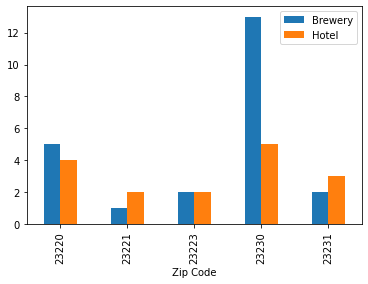

In [268]:
dff.groupby('Zip Code')[['Brewery','Hotel']].count().plot(kind="bar")

With all the data collected and sorted, we can see that Zip Code 23230 would be the optimal area to add a new brewery or an expansion